In [369]:
from glob import iglob
import pandas as pd
import pandas_profiling
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import numpy as np

In [370]:
%config InlineBackend.figure_format = 'svg'

**Задача:**
**2. Выбрать датасет и провести его анализ**
* Выбрать данные
* Составить список вопросов, по которым хотелось бы получить ответ в виде
графиков (и расширять этот список вопросов в процессе выполнения задания)
* Построить соответствующие визуализации

**Выбрал данные.**


_Speed Dating Experiment_
_What attributes influence the selection of a romantic partner?_


_Эксперимент по Быстрому Знакомству_
_Какие атрибуты влияют на выбор романтического партнера?_

https://www.kaggle.com/annavictoria/speed-dating-experiment/version/1

In [398]:
file_name = 'speed_dating_data.csv'
dating_data = pd.read_csv(file_name, index_col=0 ,sep=',', encoding = "ISO-8859-1", na_values='NaN')

In [399]:
dating_data.head(10)

id  gender  idg  condtn  wave  round  position  positin1  order  \
iid                                                                     
1    1.0       0    1       1     1     10         7       NaN      4   
1    1.0       0    1       1     1     10         7       NaN      3   
1    1.0       0    1       1     1     10         7       NaN     10   
1    1.0       0    1       1     1     10         7       NaN      5   
1    1.0       0    1       1     1     10         7       NaN      7   
1    1.0       0    1       1     1     10         7       NaN      6   
1    1.0       0    1       1     1     10         7       NaN      1   
1    1.0       0    1       1     1     10         7       NaN      2   
1    1.0       0    1       1     1     10         7       NaN      8   
1    1.0       0    1       1     1     10         7       NaN      9   

     partner   ...    attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  attr5_3  \
iid            ...                                                          
1          1   ...        5.0      7.0       7.0     7.0     7.0      NaN   
1          2   ...        5.0      7.0       7.0     7.0     7.0      NaN   
1          3   ...        5.0      7.0       7.0     7.0     7.0      NaN   
1          4   ...        5.0      7.0       7.0     7.0     7.0      NaN   
1          5   ...        5.0      7.0       7.0     7.0     7.0      NaN   
1          6   ...        5.0      7.0       7.0     7.0     7.0      NaN   
1          7   ...        5.0      7.0       7.0     7.0     7.0      NaN   
1          8   ...        5.0      7.0       7.0     7.0     7.0      NaN   
1          9   ...        5.0      7.0       7.0     7.0     7.0      NaN   
1         10   ...        5.0      7.0       7.0     7.0     7.0      NaN   

     sinc5_3  intel5_3  fun5_3  amb5_3  
iid                                     
1        NaN       NaN     NaN     NaN  
1        NaN       NaN     NaN     NaN  
1        NaN       NaN     NaN     NaN  
1        NaN       NaN     NaN     NaN  
1        NaN       NaN     NaN     NaN  
1        NaN       NaN     NaN     NaN  
1        NaN       NaN     NaN     NaN  
1        NaN       NaN     NaN     NaN  
1        NaN       NaN     NaN     NaN  
1        NaN       NaN     NaN     NaN  

[10 rows x 194 columns]

In [400]:
print(dating_data.columns)

Index(['id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order', 'partner',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=194)


### Выполним профайлинг данных

In [401]:
pandas_profiling.ProfileReport(dating_data)

### После внимательного изучения файла ``speed_dating_data_Key.doc`` 

### и просмотра статистики ``ProfileReport`` 





### Описание значение столбцов которые показались наиболее интересные.

* ``iid`` - unique subject number, group(wave id gender)
* ``id``  - subject number within wave
* ``gender`` - Female=0 Male=1
* ``round`` - number of people that met in wave

* ``order`` - the number of date that night when met partner
* ``partner`` - partner’s id number the night of event
* ``match``	- 1=yes, 0=no
* ``age_o`` - age of partner
* ``dec_o`` - decision of partner the night of event
* ``attr_o`` -	rating by partner the night of the event, for all 6 attributes

* ``age`` - age
* ``field`` - field of study

```sh
1= Law  
2= Math
3= Social Science, Psychologist 
4= Medical Science, Pharmaceuticals, and Bio Tech 
5= Engineering  
6= English/Creative Writing/ Journalism 
7= History/Religion/Philosophy 
8= Business/Econ/Finance 
9= Education, Academia 
10= Biological Sciences/Chemistry/Physics
11= Social Work 
12= Undergrad/undecided 
13=Political Science/International Affairs 
14=Film
15=Fine Arts/Arts Administration
16=Languages
17=Architecture
18=Other
```

* ``goal`` - What is your primary goal in participating in this event? 

```sh
	Seemed like a fun night out=1
	To meet new people=2
	To get a date=3
	Looking for a serious relationship=4
	To say I did it=5
	Other=6
```


* ``date`` - In general, how frequently do you go on dates? 

```sh
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7
```

* ``go_out`` - How often do you go out (not necessarily on dates)?

```sh
	Several times a week=1
	Twice a week=2
	Once a week=3
	Twice a month=4
	Once a month=5
	Several times a year=6
	Almost never=7
```
 
* ```career``` -What is your intended career?

* ``career_c``: career coded 

```sh
1= Lawyer 
2= Academic/Research 
3= Psychologist 
4= Doctor/Medicine 
5=Engineer 
6= Creative Arts/Entertainment 
7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
8= Real Estate 
9= International/Humanitarian Affairs 
10= Undecided 
11=Social Work
12=Speech Pathology
13=Politics
14=Pro sports/Athletics
15=Other
16=Journalism
17=Architecture
```

In [377]:
# Вывод данных которые наиболее интересные.
dating_data = dating_data[['id', 'gender','age','career', 'round',
             'order', 'partner', 'match', 'age_o', 'dec_o', 'field','goal', 'date', 'go_out'
            ]]
dating_data.head()

id  gender   age  career  round  order  partner  match  age_o  dec_o  \
iid                                                                          
1    1.0       0  21.0  lawyer     10      4        1      0   27.0      0   
1    1.0       0  21.0  lawyer     10      3        2      0   22.0      0   
1    1.0       0  21.0  lawyer     10     10        3      1   22.0      1   
1    1.0       0  21.0  lawyer     10      5        4      1   23.0      1   
1    1.0       0  21.0  lawyer     10      7        5      1   24.0      1   

    field  goal  date  go_out  
iid                            
1     Law   2.0   7.0     1.0  
1     Law   2.0   7.0     1.0  
1     Law   2.0   7.0     1.0  
1     Law   2.0   7.0     1.0  
1     Law   2.0   7.0     1.0

### Feature_engineering (Преобразование значений и названий столбцов)

In [378]:
def _feature_engineering_job_by_career_and_field_columns(row):
    """
    Результате работы ``pandas_profiling.ProfileReport`` показал основные характеристики столбцов;

    ``career`` -What is your intended career?
    ``field`` - field of study

    1. Lawyer	154	0.0% | Law	121	0.0% | Law	462	0.0% | law	123	0.0%
    2. professor	199	0.0% | Professor |	Academic	|    Scientist	91	0.0%
    3. Finance	202	0.0% | Business	521	0.0%  | business	110	0.0% | MBA	468	0.0% | Finance 113	0.0%
    4. Consulting	147	0.0% |  Social Worker	136	0.0%
    5. Other values (357)	6887	0.0%


    1. Social Work	378	0.0%
    2. International Affairs	252	0.0%
    3. Electrical Engineering	164	0.0% | Engineering
    4. Psychology	139	0.0%
    """
    career = str(row['career']).lower()
    field = str(row['field']).lower()

    job = career

    for i in range(2):
        if job in ['lawyer', 'law']:
            return 'lawyer'
        if 'lawyer' in job:
            return 'lawyer'
        if job in ['professor', 'academic', 'scientist', 'economic']:
            return 'scientist'
        if 'academic' in job:
            return 'scientist'
        if 'scientist' in job:
            return 'scientist'
        if job in ['finance', 'business', 'mba', 'economist']:
            return 'finance'
        if 'business' in job:
            return 'business'
        if 'bank' in 'job':
            return 'business'
        if job in ['social', 'consulting']:
            return 'social'
        if 'social' in job:
            return 'social'
        if 'engineer' in job:
            return 'engineer'
        if 'psychology' in job:
            return 'psychology'
        if 'teach' in job:
            return 'teacher'
        job = field

    # Default action return small len career or field
    if len(career) < len(field):
        return career

    return field

In [379]:
def feature_engineering_clean_data_convert_values(dating_data):

    # gender - Female=0 Male=1
    dating_data['gender'] = dating_data['gender'].apply(lambda x: 'F' if x == 0 else 'M')

    # feature engineering job by career and field columns
    dating_data['job'] = dating_data.apply(_feature_engineering_job_by_career_and_field_columns, axis=1)

    # drop unused column
    dating_data = dating_data.drop(columns=['career', 'field'])

    return dating_data

In [380]:
dating_data = feature_engineering_clean_data_convert_values(dating_data)

In [381]:
dating_data.head()

id gender   age  round  order  partner  match  age_o  dec_o  goal  date  \
iid                                                                             
1    1.0      F  21.0     10      4        1      0   27.0      0   2.0   7.0   
1    1.0      F  21.0     10      3        2      0   22.0      0   2.0   7.0   
1    1.0      F  21.0     10     10        3      1   22.0      1   2.0   7.0   
1    1.0      F  21.0     10      5        4      1   23.0      1   2.0   7.0   
1    1.0      F  21.0     10      7        5      1   24.0      1   2.0   7.0   

     go_out     job  
iid                  
1       1.0  lawyer  
1       1.0  lawyer  
1       1.0  lawyer  
1       1.0  lawyer  
1       1.0  lawyer

### Кто больше приходи на быстрые свидания, мужчины или женьщины ?

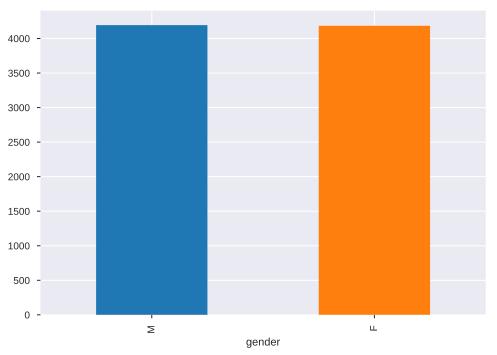

In [382]:
total = dating_data.groupby(['gender']).count().sort_values('id', ascending=False)['id']
total.plot.bar()
plt.show()

### В какой сфере работают люди, участники '''быстрых свиданий''' Составить топ 20

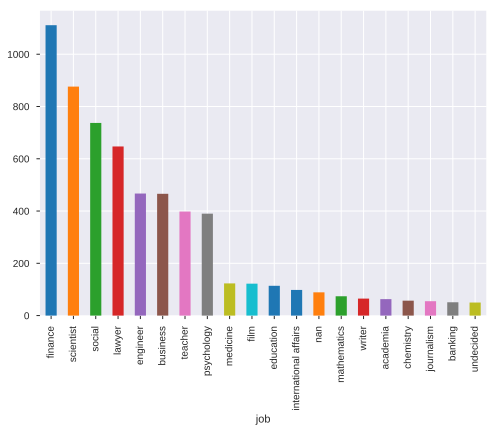

In [383]:
total = dating_data.groupby(['job']).count().sort_values('id', ascending=False)['id'][:20]
total.plot.bar()
plt.show()

### В каком возрасте мужчины и женщины идуи на быстрые свидания?

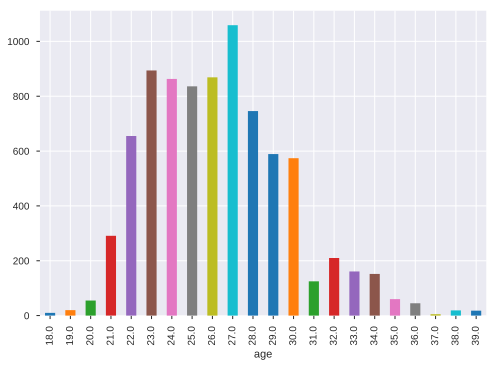

In [384]:
total = dating_data.groupby(['age']).count().sort_values('age', ascending=True)['id'][:40]
total.plot.bar()
plt.show()

### 1. Сколько раз женщины были выбраны мужчинами которых они не выбирали?
### 2. Сколько раз мужчины были выбраны женщинами которых они не выбирали?

In [385]:
gender_match_dec_o = dating_data[['gender', 'match', 'dec_o']]

In [386]:
female_not_match = gender_match_dec_o[np.logical_and(gender_match_dec_o.gender == 'F', gender_match_dec_o.match == 0)]
male_not_match = gender_match_dec_o[np.logical_and(gender_match_dec_o.gender == 'M', gender_match_dec_o.match == 0)]

In [387]:
female_not_match_have_been_matched = female_not_match[female_not_match.dec_o == 1]
male_not_match_have_been_matched = male_not_match[male_not_match.dec_o == 1]

In [388]:
print("Итого: без взаимности было выбрано женщин:")
print(female_not_match_have_been_matched.shape[0])
print("Итого: без взаимности было выбрано мужчин:")
print(male_not_match_have_been_matched.shape[0])

Итого: без взаимности было выбрано женщин:
1296
Итого: без взаимности было выбрано мужчин:
839


### Сколько взаимных симпатий было в зависимости от возраста?

In [389]:
age_gender_match = dating_data[['age', 'match', 'gender']]

In [390]:
age_gender_matched = age_gender_match[age_gender_match.match == 1]

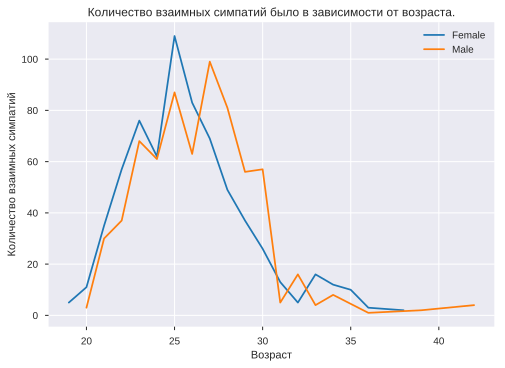

In [391]:
age_gender_matched_sorted = age_gender_matched.groupby(['age', 'gender']).count().sort_values('age', ascending=True)
age_gender_matched_sorted = age_gender_matched_sorted.reset_index()
plt.plot(
    age_gender_matched_sorted[age_gender_matched_sorted.gender == 'F']['age'], 
    age_gender_matched_sorted[age_gender_matched_sorted.gender == 'F'].match, label='Female' 
)

plt.plot(
    age_gender_matched_sorted[age_gender_matched_sorted.gender == 'M']['age'], 
    age_gender_matched_sorted[age_gender_matched_sorted.gender == 'M'].match, label='Male' 
)
plt.title('Количество взаимных симпатий было в зависимости от возраста.')
plt.xlabel('Возраст')
plt.ylabel('Количество взаимных симпатий')
plt.legend()
plt.show()

### 1. Какова основная цель участия в этом мероприятии у женщин?
### 2. Какова основная цель участия в этом мероприятии у мужчин?

* ``goal`` - What is your primary goal in participating in this event? 

```sh
	Seemed like a fun night out=1
	To meet new people=2
	To get a date=3
	Looking for a serious relationship=4
	To say I did it=5
	Other=6
```

In [392]:
goal_id_gender = dating_data[['goal', 'id', 'gender']]

In [393]:
dating_goal_female = goal_id_gender[goal_id_gender['gender'] == 'F']
dating_goal_male = goal_id_gender[goal_id_gender['gender'] == 'M']

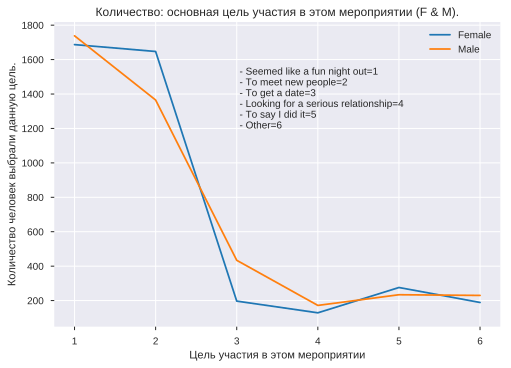

In [394]:
dating_goal_count_female = dating_goal_female.groupby(['goal']).count()[['id']].reset_index()
dating_goal_count_male = dating_goal_male.groupby(['goal']).count()[['id']].reset_index()
plt.plot(
    dating_goal_count_female['goal'], 
    dating_goal_count_female.id, label='Female' 
)

plt.plot(
    dating_goal_count_male['goal'], 
    dating_goal_count_male.id, label='Male' 
)
plt.title('Количество: основная цель участия в этом мероприятии (F & M).')
plt.xlabel('Цель участия в этом мероприятии')
plt.ylabel('Количество человек выбрали данную цель.')
plt.text(3, 1200, ' - Seemed like a fun night out=1 \n - To meet new people=2 \n - To get a date=3\n - Looking for a serious relationship=4\n - To say I did it=5\n - Other=6')
plt.legend()
plt.show()